<a href="https://colab.research.google.com/github/AlexTako/AI_practice/blob/main/machine%20vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Эксперимент:
Распознавание лица на фотографии. Выделение лица овалом.
Выделение на изображении глаз.





In [ ]:
import cv2

def blur_face(img):
  (h, w) = img.shape[:2]
  dW = int(w / 3.0)
  dH = int(h / 3.0)
  if dW % 2 == 0:
      dW -= 1
  if dH % 2 == 0:
      dH -= 1
  return cv2.GaussianBlur(img, (dW, dH), 0)



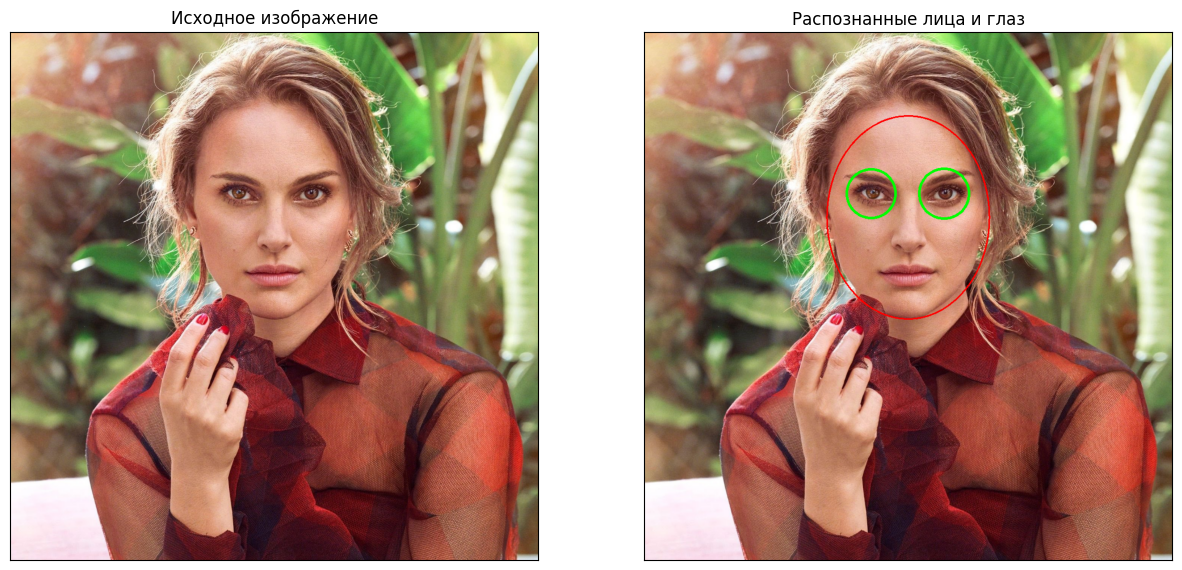

In [ ]:
# Ваше решение
import cv2
import gdown
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline


gdown.download('https://i.pinimg.com/originals/18/6f/cc/186fccb09052a831bbe6962141fb13e9.png', None, quiet=True)

# Загрузка изображения
img = cv2.imread('/content/186fccb09052a831bbe6962141fb13e9.png')
img2 = img.copy()

# загрузка каскада Хаара для поиска лиц
classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")


# загрузка каскада Хаара для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")

# выполнение распознавания лиц
bboxes = classifier_face.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(100, 100))

# формирование овалов вокруг каждого обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # определяем центр овала
    center = (int(x + 0.5*width), int(y + 0.5*height))
    size = (float(width*0.8), float(height))
    # рисование овалов
    cv2.ellipse(img2, cv2.RotatedRect(center, size, 0), (0, 0, 255), 2)

    face = img2[y:y + height, x:x + width] # найденная область с лицом



    # выполнение распознавания глаз
    eyes = classifier_eye.detectMultiScale(face)

    for (x_eye,y_eye,w_eye,h_eye) in eyes:

        # определяем центр круга
        center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))

        # вычисляем радиус окружности (подобран эмпирическим путем)
        radius = int(0.3 * (w_eye + h_eye))
        color = (0, 255, 0) # цвет в RGB (интенсивность цветов красный-зеленый-синий от 0 до 255)
        thickness = 3 # толщина линии
        # рисуем круг
        cv2.circle(face, center, radius, color, thickness)


fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица и глаз')

pyplot.show()